# Titanic | Kaggle competition


### Who will survive the Titanic?  
Join the competition: https://www.kaggle.com/c/titanic/data 
  
Let's make our predictions! 

We want to predict if a middle class, married father in his thirties has a higher chance of surviving than a low class elderly travelling alone. We don't want to predict if someone is called "John" or any other identity property. Therefore, we can drop id's and variables that can be inferred by other variables: 'PassengerId', 'Name', 'Ticket', 'Cabin'. However, the 'PassengerId' is not dropped in the test variable because our solution is a file that relates 'PassengerId' with 'Survival'. 

I want to make this simple, therefore I will ignore creating fancy new variables to make my models more accurate. For example, to understand not only the social class but the power that a person had, we can make a variable described by the 'title' that appears in the 'Name' variable, the fare it paid and/or the port they embarked. 


We can start discovering the variables on the dataset by playing with the filters that the Kaggle website provides. 

Characteristics:

- More likely to have survived: Women (Sex=female), children (Age<?), the upper-class passengers (Pclass=1).
- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.


## Importing our tools and acquiring the data.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#get collumn names  
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
train = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'], axis=1)

train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,NaN,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [6]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
test = test_df.drop(['Name', 'Ticket', 'Cabin', 'Fare', 'Embarked'], axis= 1)

test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
5,897,3,male,14.0,0,0
6,898,3,female,30.0,0,0
7,899,2,male,26.0,1,1
8,900,3,female,18.0,0,0
9,901,3,male,21.0,2,0


### Type of variables:
1) Categorical: Survived, Sex, and Embarked. 2) Ordinal: Pclass. 3) Continous: Age, Fare. 4) Discrete: SibSp, Parch.

In [8]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 19.7+ KB


### Visualizing data

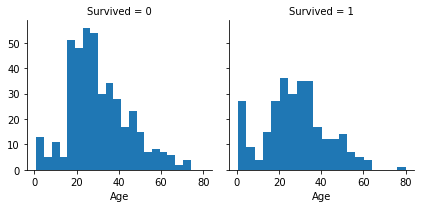

In [9]:
#Visualizing the data: Survived vs. Age
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

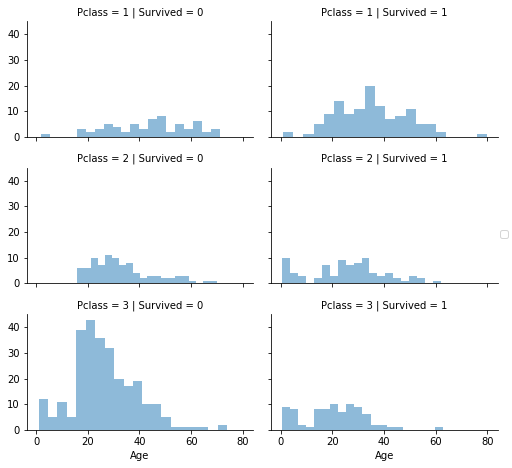

In [10]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [11]:
#Pivoting features

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
#More pivoting features 
#train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Cleaning data

In [13]:
#We make a dataframe with the other two datasets 

df = [train, test]

print(df)

[     Survived  Pclass     Sex   Age  SibSp  Parch
0           0       3    male  22.0      1      0
1           1       1  female  38.0      1      0
2           1       3  female  26.0      0      0
3           1       1  female  35.0      1      0
4           0       3    male  35.0      0      0
5           0       3    male   NaN      0      0
6           0       1    male  54.0      0      0
7           0       3    male   2.0      3      1
8           1       3  female  27.0      0      2
9           1       2  female  14.0      1      0
10          1       3  female   4.0      1      1
11          1       1  female  58.0      0      0
12          0       3    male  20.0      0      0
13          0       3    male  39.0      1      5
14          0       3  female  14.0      0      0
15          1       2  female  55.0      0      0
16          0       3    male   2.0      4      1
17          1       2    male   NaN      0      0
18          0       3  female  31.0      1      0

We may want to: 

- Transform Sex into a binary dummy variable (zeros and ones).
- Create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
- Create a new feature called "Family", based on Parch and SibSp to get total count of family members on board.

In [14]:
#Explore NAN

#result is zero
train['Sex'].isna().sum()

#result is 418 
test['Sex'].isna().sum()

0

In [15]:
#Making Sex a binary dummy variable 
for dataset in df: 
      dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [16]:
train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype=object)

In [17]:
#We don't do a new variable with title because we want to have enough with the social class. Otherwise this will be the code:
#for dataset in combine:
 #   dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)  
    
#pd.crosstab(train_df['Title'], train_df['Sex'])

### Range of Age values 

We first explore Age in relation to Pclass and Gender, and then predict a number for the nan. Later we create a ageband.

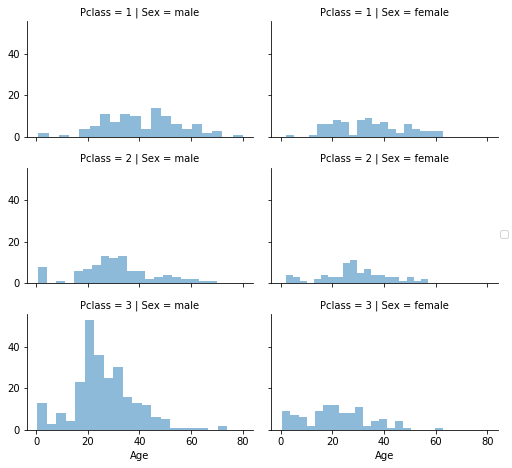

In [18]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [19]:
#Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

for dataset in df:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,34,0,0
1,893,3,1,47,1,0
2,894,2,0,62,0,0
3,895,3,0,27,0,0
4,896,3,1,22,1,1


In [21]:
#Making AgeBand
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [22]:
for dataset in df:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train.head()

#Age band cannot be removed from now on

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeBand
0,0,3,0,1,1,0,"(16.0, 32.0]"
1,1,1,1,2,1,0,"(32.0, 48.0]"
2,1,3,1,1,0,0,"(16.0, 32.0]"
3,1,1,1,2,1,0,"(32.0, 48.0]"
4,0,3,0,2,0,0,"(32.0, 48.0]"


### Creating new features: "Family" and "IsAlone".

In [23]:
for dataset in df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeBand,FamilySize
0,0,3,0,1,1,0,"(16.0, 32.0]",2
1,1,1,1,2,1,0,"(32.0, 48.0]",2
2,1,3,1,1,0,0,"(16.0, 32.0]",1
3,1,1,1,2,1,0,"(32.0, 48.0]",2
4,0,3,0,2,0,0,"(32.0, 48.0]",1


In [24]:
#Another feature called "IsAlone"

for dataset in df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


#### More droping

In [25]:
#train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
#test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df = [train, test]

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeBand,FamilySize,IsAlone
0,0,3,0,1,1,0,"(16.0, 32.0]",2,0
1,1,1,1,2,1,0,"(32.0, 48.0]",2,0
2,1,3,1,1,0,0,"(16.0, 32.0]",1,1
3,1,1,1,2,1,0,"(32.0, 48.0]",2,0
4,0,3,0,2,0,0,"(32.0, 48.0]",1,1


### Converting categorical feature to numeric

In [26]:
train = train.dropna()

train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
AgeBand       0
FamilySize    0
IsAlone       0
dtype: int64

# Finally!!!  | Modelling and predicting

Let's recheck our datasets

In [27]:
train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'AgeBand',
       'FamilySize', 'IsAlone'], dtype=object)

In [28]:
test.columns.values

array(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'FamilySize', 'IsAlone'], dtype=object)

In [29]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
SibSp         891 non-null int64
Parch         891 non-null int64
AgeBand       891 non-null category
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: category(1), int32(2), int64(6)
memory usage: 56.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: int32(2), int64(6)
memory usage: 22.9 KB


In [30]:
X_train = train.drop(["Survived", 'AgeBand'], axis=1)
Y_train = train['Survived']
X_test  = test.drop(["PassengerId"], axis=1) 
Y_test = test["PassengerId"]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((891, 7), (891,), (418, 7), (418,))

In [31]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,FamilySize,IsAlone
0,3,0,1,1,0,2,0
1,1,1,2,1,0,2,0
2,3,1,1,0,0,1,1
3,1,1,2,1,0,2,0
4,3,0,2,0,0,1,1


In [32]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,FamilySize,IsAlone
0,3,0,2,0,0,1,1
1,3,1,2,1,0,2,0
2,2,0,3,0,0,1,1
3,3,0,1,0,0,1,1
4,3,1,1,1,1,3,0


### A bit of everything 

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Logistic Regression 

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

print (logreg.score( X_train , Y_train ))

0.8013468013468014


In [35]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.552238
5,AgeBand,0.158686
2,Age,-0.029885
4,Parch,-0.351091
3,SibSp,-0.581545
6,FamilySize,-0.748241
0,Pclass,-0.862970
7,IsAlone,NaN


KNeighbors Classifier

In [36]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
 
# Create a k-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier (n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

# Print the accuracy, this does not work> print(knn.score(X_test, Y_test))

81.03


Support Vector Machines 
SVC

In [37]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.72

Naive Bayes classifier

In [38]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.76

Perceptron

In [39]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


77.22

In [40]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.13

In [41]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


74.3

In [42]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.62

In [43]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.62

Model evaluation

In [44]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

ValueError: arrays must all be same length